In [1]:
from pathlib import Path

import corner
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from elm import elm

Using database version X4-2024-12-31 located in: /home/beyerk/db/exfor/unpack_exfor-2024/X4-2024-12-31


In [15]:
results_dir = Path("./simple_so_no_intercept")

In [3]:
chains = np.load(results_dir / "all_chains.npy"))

In [4]:
logp = np.load(results_dir /  "log_likelihood.npy")

In [5]:
chains.shape

(64, 18000, 13)

In [6]:
logp.shape

(64, 18000)

## Chains

Text(0.5, 0, '$i$')

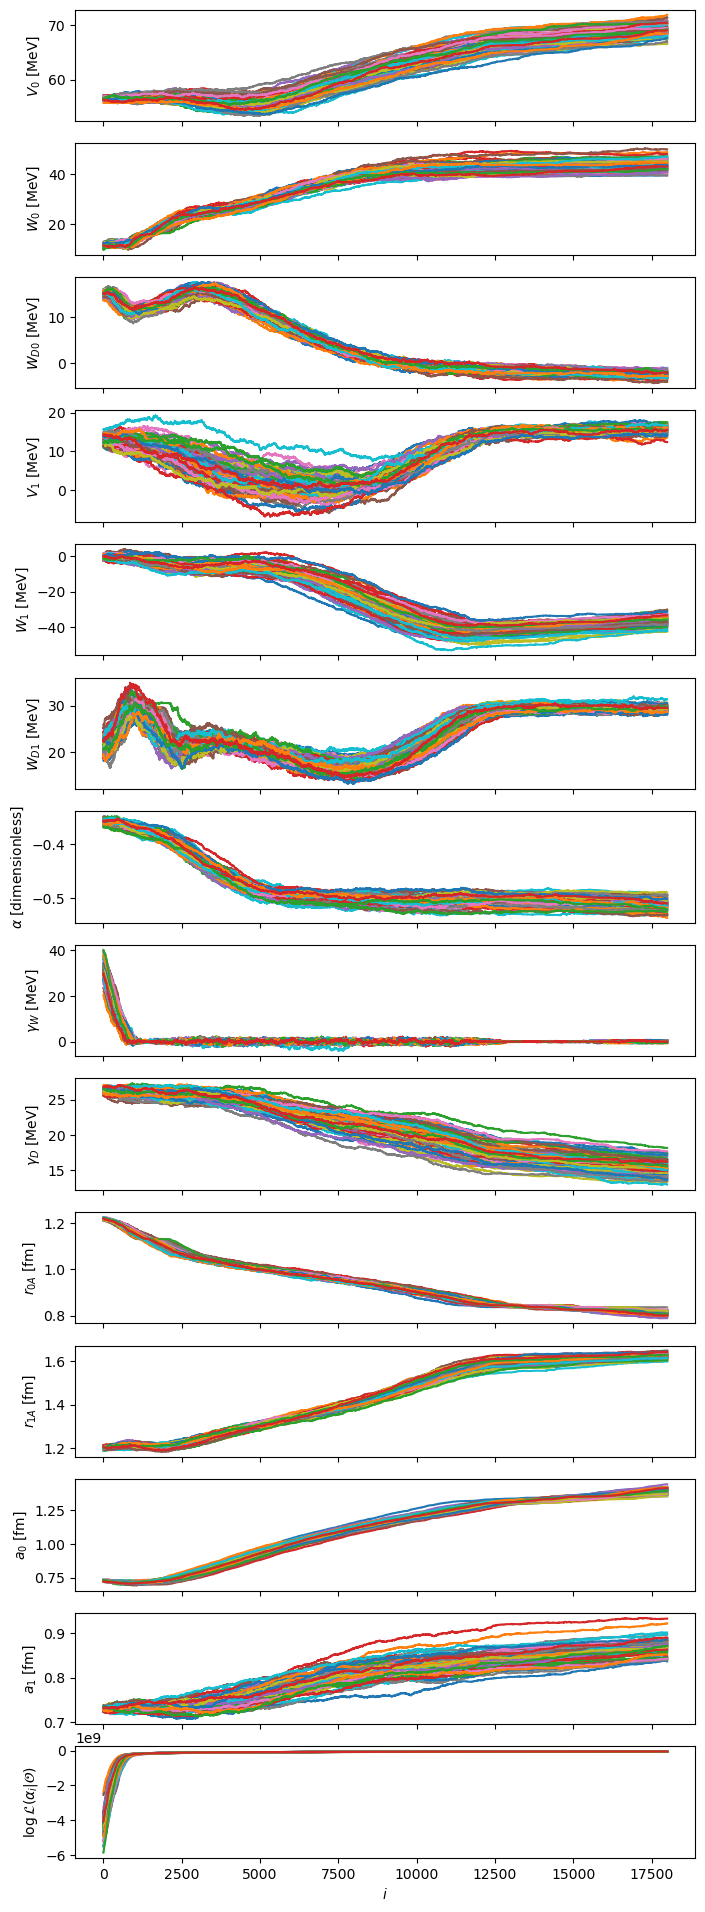

In [7]:
fig, axes = plt.subplots(chains.shape[2] + 1, 1, figsize=(8, 24), sharex=True)
for i in range(chains.shape[2]):
    for chain in range(chains.shape[0]):
        axes[i].plot(chains[chain, :, i])
        axes[i].set_ylabel(f"${elm.params[i].latex_name}$ [{elm.params[i].unit}]")


for chain in range(chains.shape[0]):
    axes[-1].plot(logp[chain, ...], label=f"{chain}")
    axes[-1].set_ylabel(r"$\log{\mathcal{L}(\alpha_i | \mathcal{O})}$")

axes[-1].set_xlabel(r"$i$")
# plt.legend(title="chains", ncol=3,)

## Corner plot

In [8]:
def draw_samples(chains, draws, burn):
    return chains[:, burn:, :].reshape(
        chains.shape[0] * (chains.shape[1] - burn), chains.shape[2]
    )[np.random.choice(chains.shape[0] * (chains.shape[1] - burn), draws), :]

In [9]:
labels = [f"${p.latex_name}$" for p in elm.params]

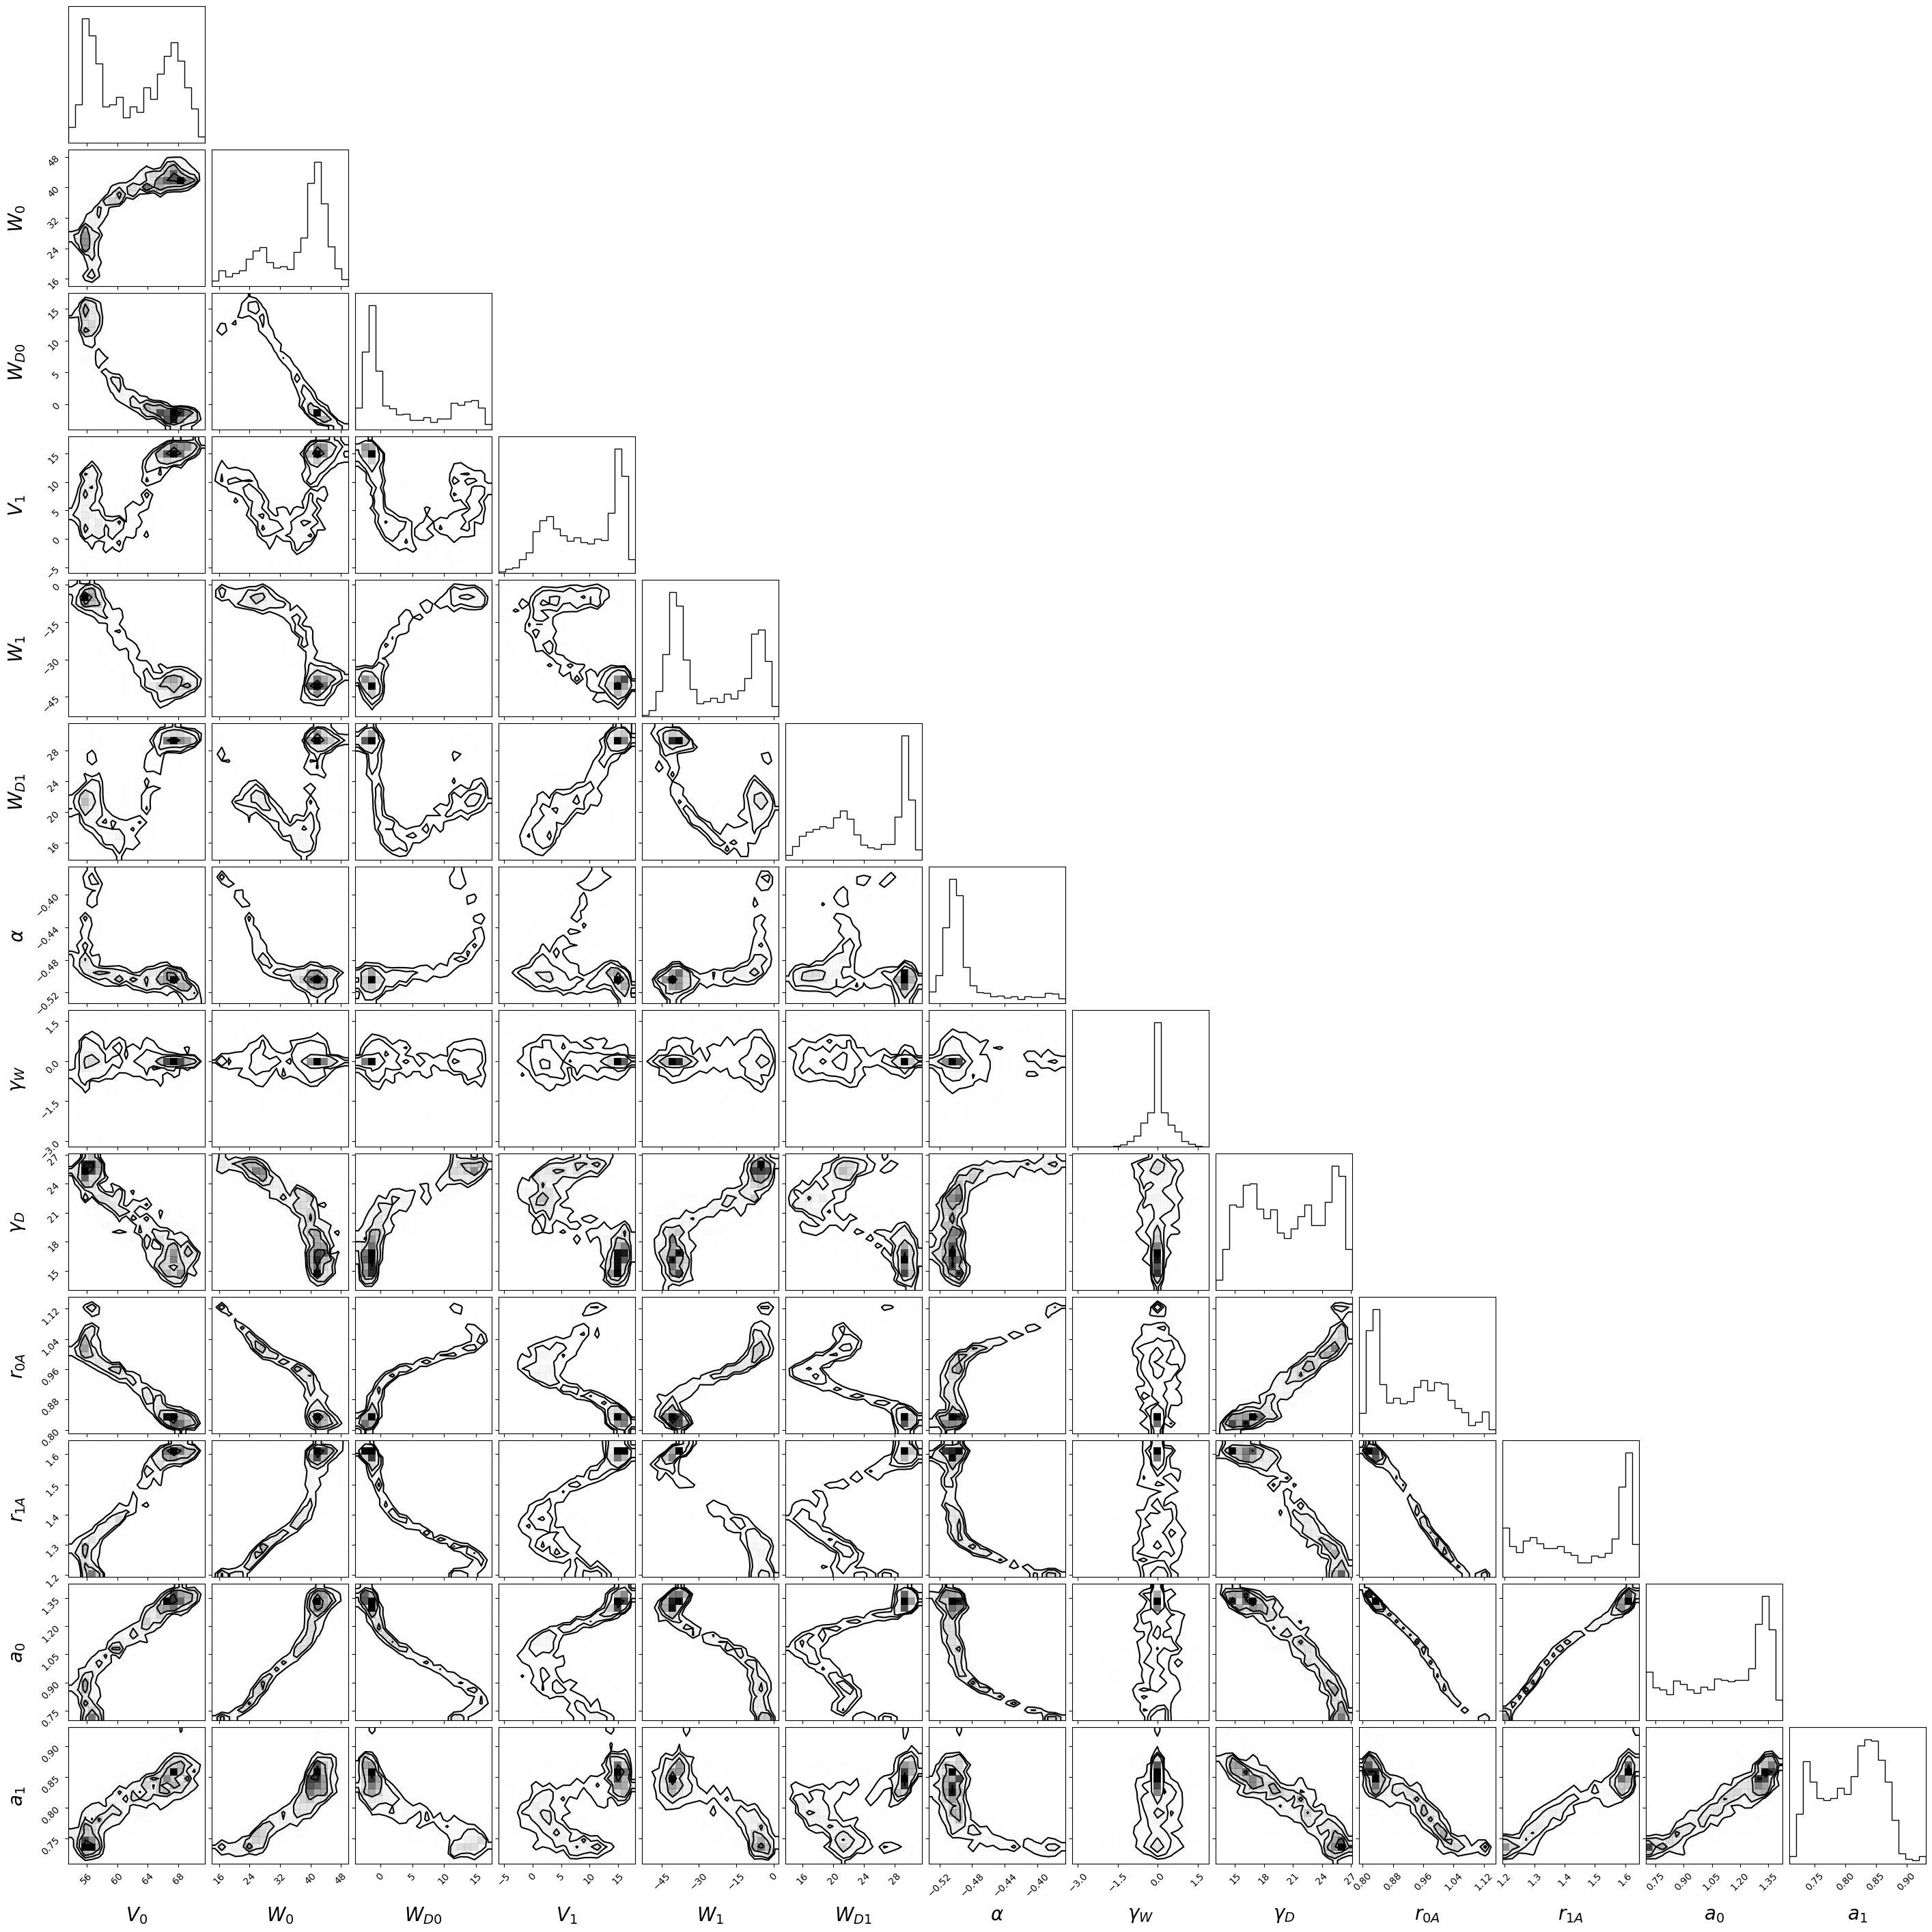

In [14]:
fig = corner.corner(
    draw_samples(chains, draws=2000, burn=1200),
    labels=labels,
    show_titles=False,
    title_kwargs={"fontsize": 16},
    label_kwargs={"fontsize": 20, "labelpad": 50},
    plot_density=True,
    plot_datapoints=False,
)